<a href="https://colab.research.google.com/github/urvesh2012/MLTSA25_UBhagat/blob/main/labs/MLTSA_WK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [8]:
np.random.seed(77)
mydish=np.random.randn(100)

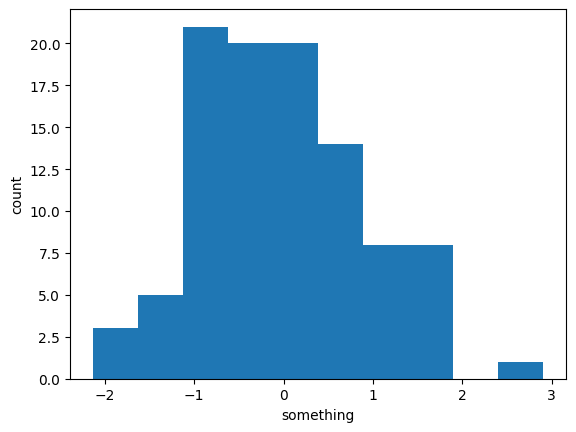

In [9]:
plt.hist(mydish)
plt.xlabel("something")
plt.ylabel("count")
plt.show()

In [17]:
url="https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/grb050525A.csv"
grbAG=pd.read_csv(url)
grbAG

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0
...,...,...,...,...,...
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1


In [18]:
grbAG.columns

Index(['filter', 'time', 'mag', 'magerr', 'upperlimit'], dtype='object')

In [19]:
grbAG[['time', 'mag', 'magerr', 'upperlimit']].corr()

,time,mag,magerr,upperlimit
time,1.000000,0.846971,0.517663,0.506833
mag,0.846971,1.000000,0.602576,NaN
magerr,0.517663,0.602576,1.000000,0.999288
upperlimit,0.506833,NaN,0.999288,1.000000


<Axes: xlabel='time', ylabel='mag'>

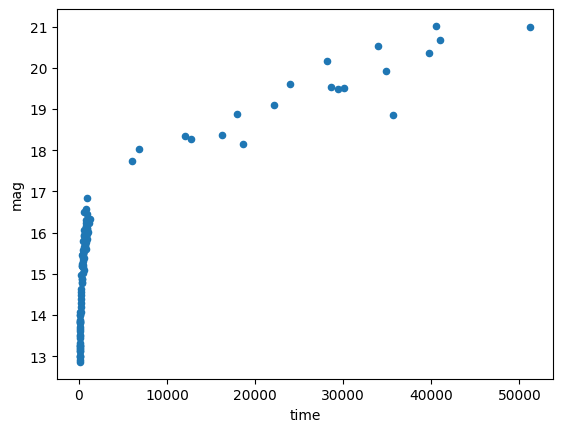

In [20]:
grbAG.plot(x="time",y="mag",kind="scatter")

In [24]:
grbAG['logtime']=np.log10(grbAG.loc[:,'time'])

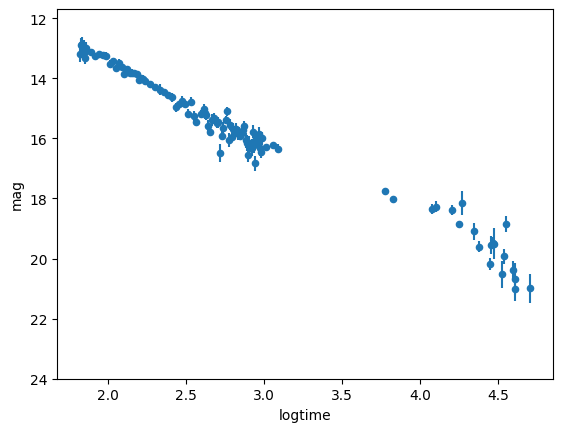

In [28]:
ax=grbAG.plot(x="logtime",y="mag",kind="scatter",yerr="magerr")
ax.set_ylim(24,11.7);

In [29]:
from sklearn.linear_model import LinearRegression

In [ ]:
x=grbAG["logtime"].values
X=np.c_[[np.ones]]
y=grbAG["mag"]

In [31]:
lr=LinearRegression()
x=grbAG["logtime"]
y=grbAG["mag"]
lr.fit(x,y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.